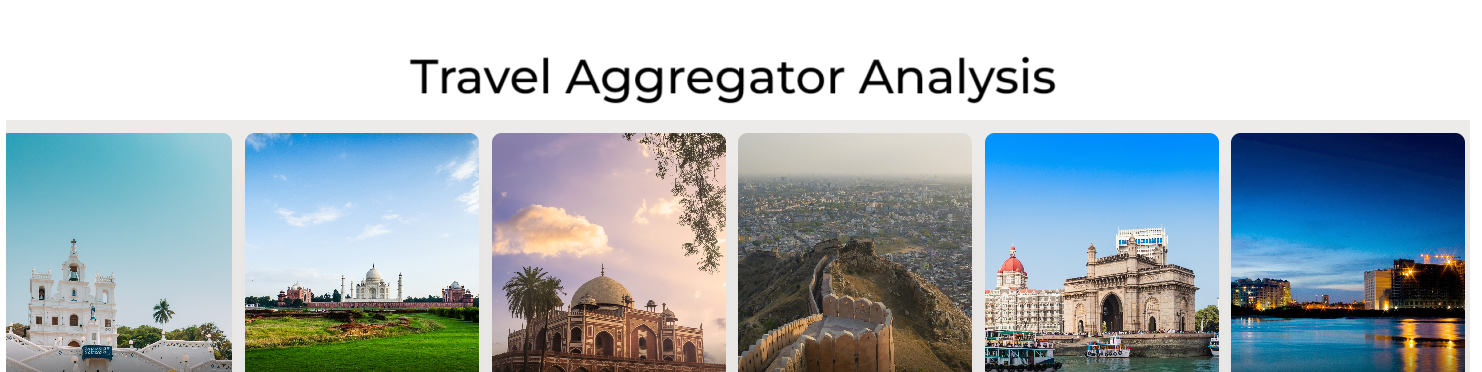

# 🌴Project Aim


<font size=4>Objective</font>:

To enhance the performance and user experience of "Trip Away," a comprehensive travel aggregator, through in-depth data analysis.

<font size=4>Goals</font>:
1. **Analyze Customer Behavior**: Understand booking trends to tailor services to customer needs.
2. **Identify High-Demand Routes**: Predict peak travel times and popular destinations to optimize resource allocation.
3. **Detect Anomalies**: Identify and address fraudulent bookings or unusual price fluctuations to ensure platform integrity.
4. **Improve Conversion Rates**: Enhance the search-to-booking process to increase user engagement and transaction rates.
5. **Customer Retention & Marketing**: Develop strategies to retain loyal customers and optimize marketing efforts based on data insights.

This data-driven approach will leverage Python to extract valuable insights and provide actionable recommendations for improving the platform's efficiency and customer satisfaction.

# 🌴About the data

<font color=darkblue>*The analysis draws on data spanning a period of more than 3 years, 10 months, and 7 days.*</font>

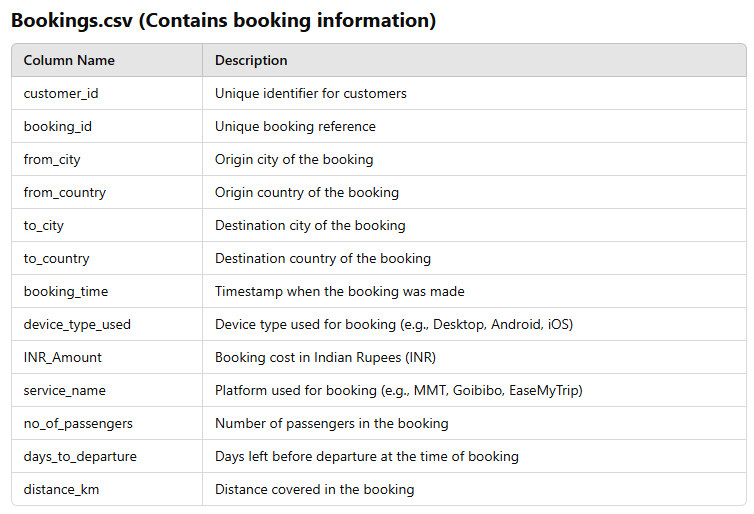

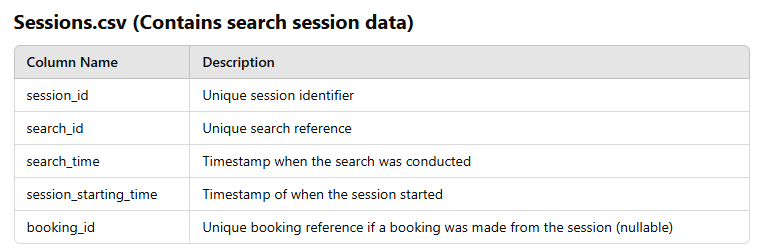

# 🌴Load Dependencies & Data

In [55]:
import pandas as pd
import numpy as np

import datetime

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

Mount the google drive

In [3]:
bookings = pd.read_csv('/content/drive/MyDrive/Portfolio Projects/Travel Aggregator Analysis/data/bookings.csv')
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [4]:
sessions = pd.read_csv('/content/drive/MyDrive/Portfolio Projects/Travel Aggregator Analysis/data/sessions.csv')
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


## 🏖️ Glimpse the data

In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


<font size=4 color=#355E3B><b>Observations</b></font>

* No Missing Values.


In [6]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


<font size=4 color=#355E3B><b>Observations</b></font>

Not every search session results in a booking. Users might search for travel options, compare prices, and then decide not to book. Therefore, the booking_id column is only populated when a booking is actually made.

#🌴 Exploratory Data Analysis

## 🏖️ 1. Count the number of distinct: Bookings, Sessions, Searches

In [7]:
print(f'There are {bookings["booking_id"].nunique()} unique bookings in the data.')

There are 339 unique bookings in the data.


In [8]:
print(f'There are {sessions["session_id"].nunique()} unique sessions in the data.')

There are 331 unique sessions in the data.


In [9]:
print(f'There are {sessions["search_id"].nunique()} unique searches in the data.')

There are 1360 unique searches in the data.


## 🏖️ 2. Identify sessions with multiple bookings

<font color=#355E3B>*Visualize the distribution of bookings per session using Histogram.*</font>




In [10]:
#ℹ️ Find bookings per session
bookings_per_session = sessions.groupby('session_id')['booking_id'].count().reset_index(name='nr_bookings')
#bookings_per_session

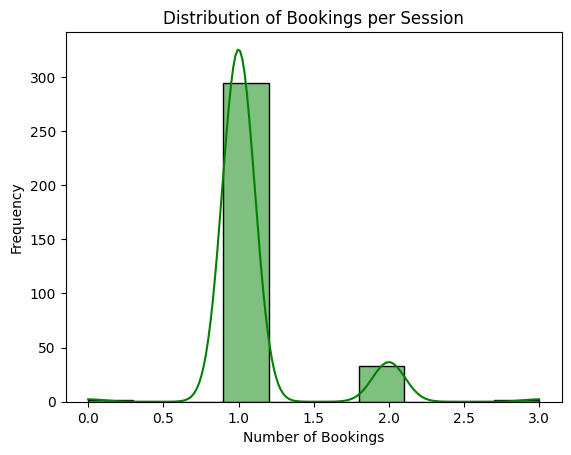

In [11]:
#ℹ️ Plot histogram
sns.histplot(bookings_per_session['nr_bookings'], kde=True, color='green')
plt.title('Distribution of Bookings per Session')
plt.xlabel('Number of Bookings')
plt.ylabel('Frequency')
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

Multiple bookings per session are rare, with a few sessions having 2 bookings and only one session reaching 3 bookings.

## 🏖️ 3. Analyze booking trends

<font color=#355E3B>*Determine the days of the week with the highest number of bookings.*</font>

In [12]:
# ℹ️ Convert booking_time to datetime object
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
# ℹ️ Extract weekday from booking_time
bookings['weekday'] = bookings['booking_time'].dt.strftime('%A')

In [13]:
# ℹ️ Count the number of bookings by weekday
bookings_per_weekday = bookings['weekday'].value_counts().reset_index()

print(f'The day of the week with the highest number of bookings is {bookings_per_weekday.head(1)["weekday"].values[0]}. ')
print(f'It has a total of {bookings_per_weekday["count"].values[0]} bookings.')


The day of the week with the highest number of bookings is Thursday. 
It has a total of 65 bookings.


<font color=#355E3B>*Visualize this distribution using a pie chart.*<font>

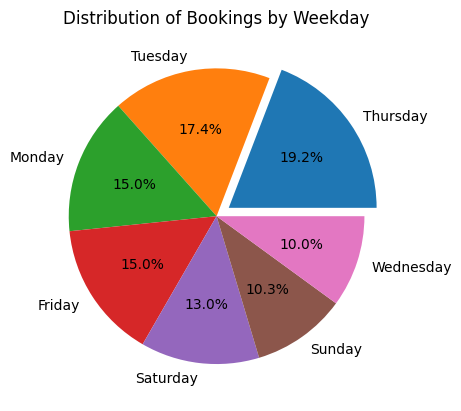

In [62]:
# ℹ️ Find the index of the highest value
max_index = bookings_per_weekday['count'].idxmax()

# ℹ️ Create explode list
explode = [0.1 if i == max_index else 0 for i in range(len(bookings_per_weekday))]

# ℹ️ Create pie chart
plt.pie(bookings_per_weekday['count'], labels=bookings_per_weekday['weekday'], autopct='%1.1f%%', explode=explode)
plt.title('Distribution of Bookings by Weekday')
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* Thursday is the most popular day.

* Weekend(Saturday + Sunday) bookings account for 23.3% of total bookings, highlighting the importance of weekend bookings for this business or service.


## 🏖️ 4. Service Performance Analysis

<font color=#355E3B>*Calculate the total number of bookings and the Gross Booking Value (INR) for each service name.*<font>





In [15]:
service_name_aggregations = bookings.groupby("service_name"). agg({
    'booking_id' : ['count'],
    'INR_Amount' : ['sum']}).reset_index()

# ℹ️ Update column names
service_name_aggregations.columns = ['service_name', 'total_bookings', 'revenue(INR)']
#service_name_aggregations

<font color=#355E3B>*Visualize using Bar chart comparing total bookings and revenue per service.*</font>


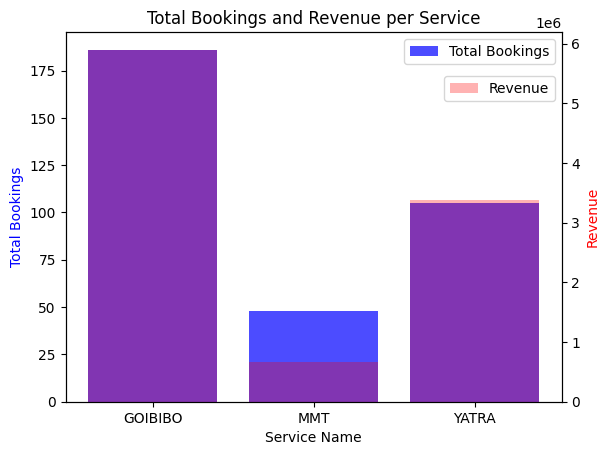

In [16]:
# ℹ️ Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# ℹ️ Plot the total bookings
ax1.bar(service_name_aggregations['service_name'], service_name_aggregations['total_bookings'], color='b', alpha=0.7, label='Total Bookings')

# ℹ️ Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# ℹ️ Plot the revenue
ax2.bar(service_name_aggregations['service_name'],service_name_aggregations['revenue(INR)'], color='r', alpha=0.3, label='Revenue')

# ℹ️ Add labels
ax1.set_xlabel('Service Name')
ax1.set_ylabel('Total Bookings', color='b')
ax2.set_ylabel('Revenue', color='r')

# ℹ️ Add a title
plt.title('Total Bookings and Revenue per Service')

# ℹ️ Add legends
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1.0,0.9))

# ℹ️ Show the plot
plt.show()


<font size=4 color=#355E3B><b>Observations</b></font>

* GOIBIBO stands out with the highest total bookings and revenue. It holds a significant market share in terms of both the volume of bookings and the revenue generated.
* MMT (MakeMyTrip) shows the lowest revenue(less than 1 million) and bookings among the three services, indicating potential difficulties in customer acquisition or revenue generation; strategic actions may be needed to enhance its market position.
* YATRA exhibits moderate performance in both total bookings and revenue. Though not a market leader, it maintains a substantial share.

## 🏖️ 5. Most Popular Routes

<font color=#355E3B>*Identify the most booked route (from_city to to_city) for customers who have more than one booking.*</font>

In [17]:
# ℹ️ Counting total bookings per customer
bookings_by_customers = bookings['customer_id'].value_counts().reset_index(name='total_bookings')
# ℹ️ Filtering customers with more than one booking.
customers_multiple_bookings = bookings_by_customers[bookings_by_customers['total_bookings'] > 1]

# ℹ️ Filter bookings to only include customers listed in customers_multiple_bookings
bookings_filtered = bookings[bookings['customer_id'].isin(customers_multiple_bookings['customer_id'])]

In [18]:
# ℹ️ Counting the number of bookings for each city pair
route_bookings_count = bookings_filtered.groupby(['from_city', 'to_city'])['booking_id'].count().reset_index(name='total_bookings')
# Sorting the results and displaying the top routes
route_bookings_count.sort_values(by='total_bookings', ascending=False, inplace=True)

<font color=#355E3B>*Visualize the top 5 routes displayed in a horizontal bar chart.*</font>

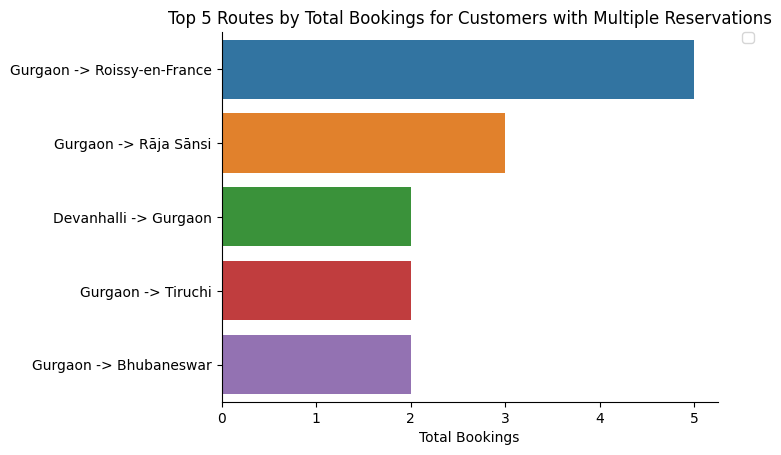

In [19]:
# ℹ️ Create a route column
route_bookings_count['route'] = route_bookings_count['from_city'] + ' -> ' + route_bookings_count['to_city']

# ℹ️ Create bar chart
ax = sns.barplot(data=route_bookings_count.head(), x='total_bookings', y='route', hue='route')

# ℹ️ Remove axis spines top and right
sns.despine()

# ℹ️ Update plot layout
plt.title('Top 5 Routes by Total Bookings for Customers with Multiple Reservations')
plt.xlabel('Total Bookings')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

The bar chart underscores the importance of the Gurgaon to Roissy-en-France route, while highlighting Gurgaon's overall significance as a hub for repeat business.

## 🏖️ 6. Advanced Booking Patterns

<font color=#355E3B>*Determine the top 3 departure cities where customers book significantly in advance (only consider cities with at least 5 departures).*</font>

In [20]:
# ℹ️Count the departures per city
departures_per_city = bookings.groupby(by='from_city')['booking_id'].count().reset_index(name='total_departures')

# ℹ️ Filter and reset index for cities with 5+ departures
departures_per_city_more_than_5 = departures_per_city[departures_per_city['total_departures'] >= 5].reset_index(drop=True)

# Filter bookings for cities with 5+ departures
departures_per_city_more_than_5_filtered = bookings[bookings['from_city'].isin(departures_per_city_more_than_5['from_city'])]

cities_days_to_depart = departures_per_city_more_than_5_filtered[['from_city', 'days_to_departure']]

# ℹ️ Get top 3 longest advanced bookings
top_3_longest_advanced_bookings= cities_days_to_depart.sort_values(by='days_to_departure', ascending=False).reset_index().head(3)
top_3_longest_advanced_bookings

,index,from_city,days_to_departure
0,71,Gurgaon,311.0
1,230,Devanhalli,226.0
2,212,Mumbai,218.0


<font color=#355E3B>*Use Box plot showing days to departure for different cities.*</font>

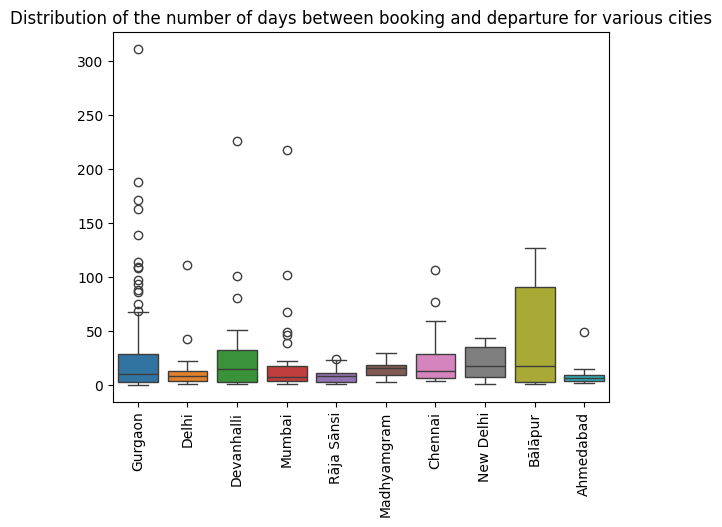

In [21]:
# ℹ️ Create a Boxplot
sns.boxplot(data=departures_per_city_more_than_5_filtered, x='from_city', y='days_to_departure', hue='from_city')
plt.xticks(rotation=90)
plt.title('Distribution of the number of days between booking and departure for various cities')
plt.xlabel('')
plt.ylabel('')
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* Short-Term Bookings Prevail: In most cities (Delhi, Mumbai, Raja Sansi, Madhyamgram, Chennai, New Delhi, and Ahmedabad), bookings are generally made just before the departure date

* Gurgaon and Devanhalli exhibit greater variability, with a broader range of days to departure and some bookings made well in advance.

* Bālāpur stands out with bookings made well in advance, indicated by its high median and wide interquartile range (IQR). This suggests unique travel characteristics like special events, limited availability, or different planning habits.

The presence of outliers in several cities suggests that there are always some individuals who plan their trips well in advance.

## 🏖️ 7. Correlation Analysis

<font color=#355E3B>*Plot a heatmap displaying the correlation between numerical columns in the bookings dataset.*</font>

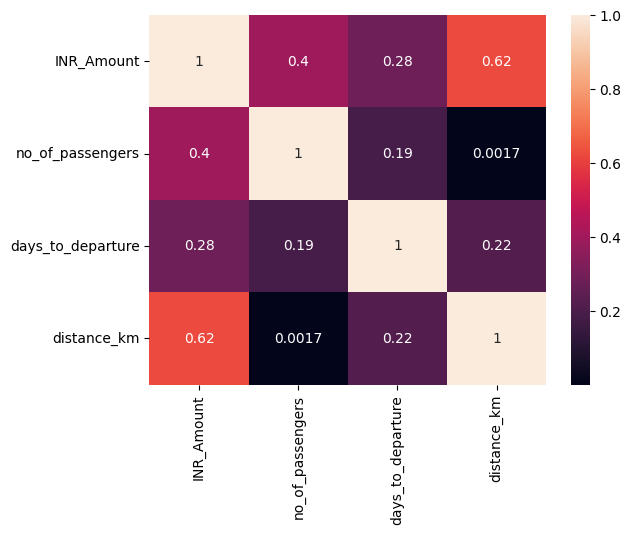

In [22]:
num_cols = [c for c in bookings.columns if bookings[c].dtype == 'float64']

sns.heatmap(bookings[num_cols].corr(), annot=True)
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* The strongest correlation is between the `INR_amount` and `distance_km`, indicating that longer distances tend to have higher costs.
* The `no_passengers` also has a moderate positive correlation with the `INR_amount`, suggesting that more passengers generally increase the cost.

## 🏖️ 8. Device Preferences

<font color=#355E3B>*Identify the most used device type for bookings for each service provider.*</font>

In [23]:
# ℹ️ Count total bookings by service name and device type
service_device_booking_count = bookings.groupby(by=['service_name', 'device_type_used'])['booking_id'] \
                                      .count().reset_index(name='total_bookings')
#service_device_booking_count

<font color=#355E3B>*Visualize using Stacked bar chart for device usage per service provider.*</font>

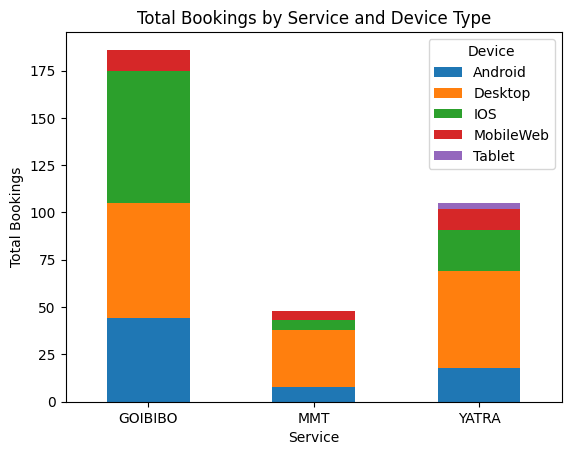

In [24]:
#ℹ️ Pivot the dataframe
df_pivot = service_device_booking_count.pivot(index='service_name', columns='device_type_used', values='total_bookings')
df_pivot

# ℹ️ Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Service')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Service and Device Type')
plt.legend(title='Device')
plt.xticks(rotation=360)
plt.show()


<font size=4 color=#355E3B><b>Observations</b></font>

* GOIBIBO stands out as the most popular service among the three, attracting a diverse user base across various device types, with a particular emphasis on catering to iOS users.
* MMT primarily caters to desktop users.
* YATRA has a good presence on both desktop and Android platforms.

The use of tablets for booking on these services is minimal.

## 🏖️ 9. Quarterly Booking Trends

<font color=#355E3B>*Plot a time series analysis showing the number of bookings per quarter, categorized by device type.*</font>

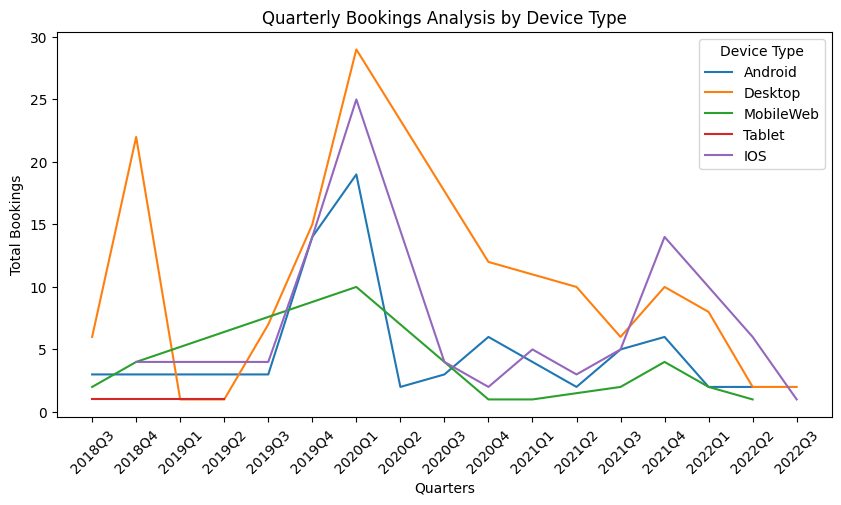

In [25]:
# ℹ️ Convert booking time to quarter format and store as string
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').astype(str)

# ℹ️ Find the number of bookings per quarter, categorized by device type.
bookings_per_quarter_device = bookings.groupby(['quarter', 'device_type_used'])['booking_id'].count()
bookings_per_quarter_device = bookings_per_quarter_device.reset_index(name='total_bookings')

# ℹ️ Create a line plot showing quarterly bookings by device type
bookings_per_quarter_device = bookings.groupby(['quarter', 'device_type_used'])['booking_id'].count()
bookings_per_quarter_device = bookings_per_quarter_device.reset_index(name='total_bookings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=bookings_per_quarter_device, x='quarter', y='total_bookings', hue='device_type_used')
plt.title('Quarterly Bookings Analysis by Device Type')
plt.legend(title='Device Type')
plt.ylabel('Total Bookings')
plt.xlabel('Quarters')
plt.xticks(rotation=45)
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* Desktop: Highly fluctuating, with sharp increases and drops. It had a significant peak in Q1 2020 but gradually declined afterward.
* iOS: Similar to Desktop, with a large peak in early 2020 but a decline after that.
* Android: Saw steady growth until Q4 2019, peaked in Q1 2020, then declined, with small fluctuations afterward.
* Mobile Web : Showed a gradual increase until Q1 2020, followed by a decline but with smaller fluctuations than other device types.
*Tablet : Remained the lowest in total bookings throughout, with minimal changes.

## 🏖️ 10. Calculate the overall booking-to-search ratio (oBSR)

$\text{oBSR} = \frac{\text{Total Bookings}}{\text{Total Searches}}$

In [26]:
# ℹ️ Merge the two datasets
merged = pd.merge(sessions, bookings, on='booking_id', how='left')

# ℹ️ Convert 'search_time' to datetime
merged['search_time'] = pd.to_datetime(merged['search_time'], format='ISO8601', errors='coerce')

merged['date'] = merged['search_time'].dt.date
merged['weekday'] = merged['search_time'].dt.strftime('%A')

# ℹ️ Aggregate total bookings, searches, and customers by date
daily_summary = merged.groupby(by='date').agg(
        total_bookings=('booking_id', 'nunique'),
    total_searches=('search_id', 'nunique'),
        total_customers = ('customer_id', 'nunique')
).reset_index()

# ℹ️ Calculate oBSR as the ratio of total bookings to total searches
daily_summary['oBSR'] = np.round(daily_summary['total_bookings'] / daily_summary['total_searches'], 2)

# ℹ️ Create a Plotly line chart
fig = px.line(daily_summary, x='date', y='oBSR', color_discrete_sequence=['darkgoldenrod'])

# ℹ️ Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title=' ',
    title={
       'text': 'Overall Booking-to-Search Ratio',
        'x': 0.5,
        'xanchor': 'center'
    }
)

# ℹ️ Show the plot
fig.show()

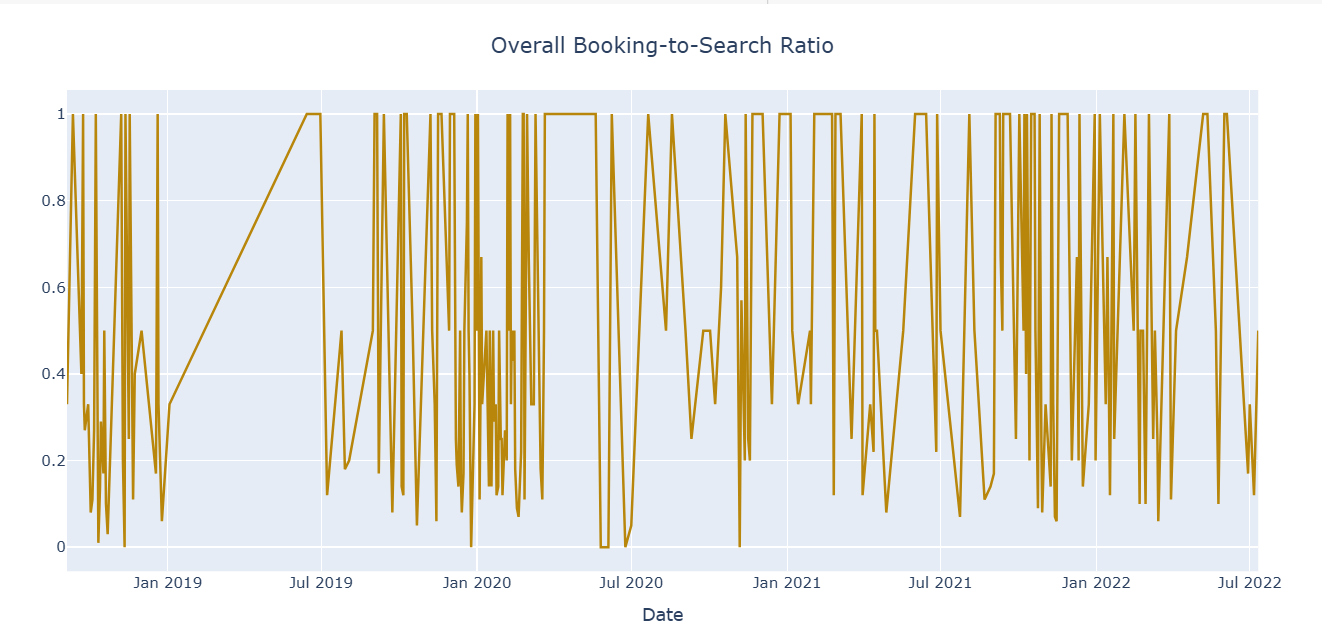

<font color=#355E3B>*What is the average of oBSR for each month of the year?*</font>

In [27]:
# ℹ️ Extract the month from the 'date' column and map it to month names
daily_summary['month'] = pd.to_datetime(daily_summary['date']).dt.month
# map month to month name
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

daily_summary['month']= daily_summary['month'].map(month_mapping)

# ℹ️ Calculate the mean oBSR for each month
avg_monthly_oBSR = np.round(daily_summary.groupby('month')['oBSR'].mean(), 2).reset_index(name = 'avg_monthly_oBSR')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# ℹ️ Sort the DataFrame by the defined month order
avg_monthly_oBSR['month']= pd.Categorical(avg_monthly_oBSR['month'], categories=month_order, ordered=True)
avg_monthly_oBSR = avg_monthly_oBSR.sort_values(by='month')


# ℹ️ Create a Plotly line chart
fig = px.line(avg_monthly_oBSR, x='month', y='avg_monthly_oBSR',color_discrete_sequence=['green'])

# ℹ️ Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average oBSR',
    title={
       'text': 'Average oBSR for Each Month',
        'x': 0.5,
        'xanchor': 'center'
    }
)

# ℹ️ Show the plot
fig.show()

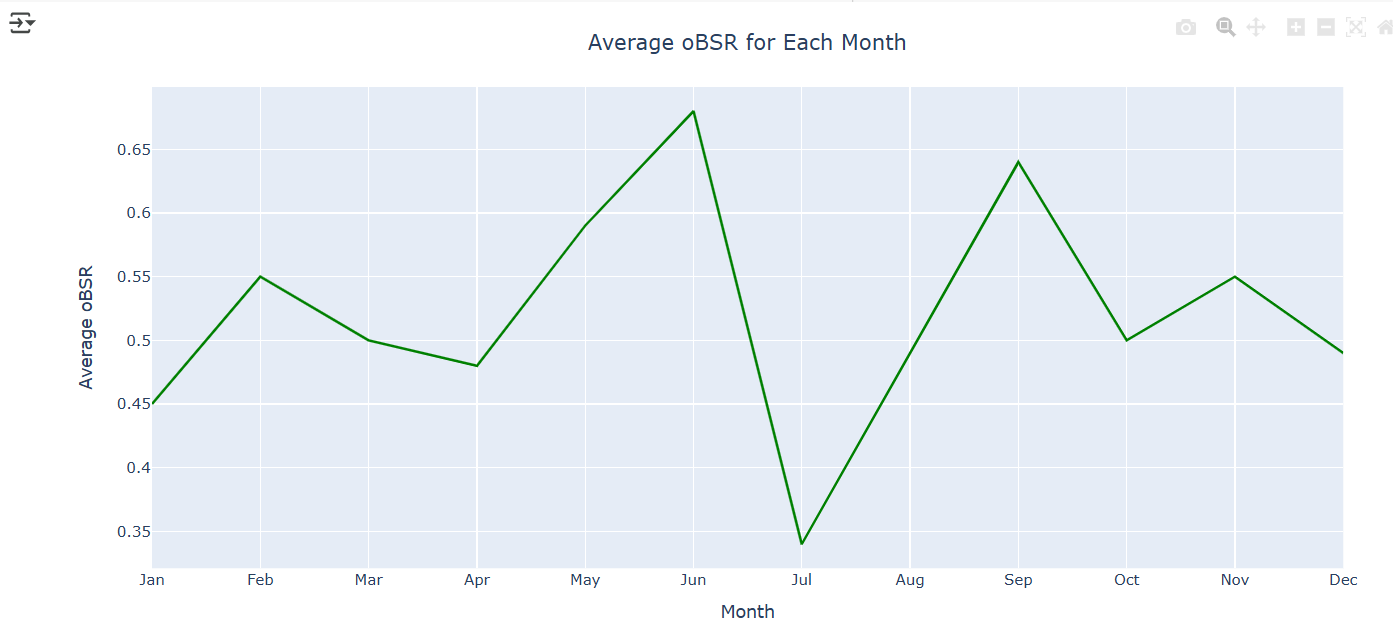

<font size=4 color=#355E3B><b>Observations</b></font>
* The highest average oBSR occurs in June and September, indicating strong performance in these months.
* A sharp decline is seen in July, marking the lowest point in the dataset.

<font color=#355E3B>*What is the average of oBSR for each day of week?*</font>

In [28]:
# Convert the 'date' column to datetime format and extract the weekday name
daily_summary['weekday'] = pd.to_datetime(daily_summary['date']).dt.day_name()

# ℹ️ Calculate the mean oBSR for each day of the week
avg_daily_oBSR = np.round(daily_summary.groupby('weekday')['oBSR'].mean(), 2).reset_index(name = 'avg_daily_oBSR')

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# ℹ️ Sort the DataFrame by the defined month order
avg_daily_oBSR['weekday']= pd.Categorical(avg_daily_oBSR['weekday'], categories=weekday_order, ordered=True)
avg_daily_oBSR = avg_daily_oBSR.sort_values(by='weekday')

# ℹ️ Create a Plotly line chart
fig = px.line(avg_daily_oBSR, x='weekday', y='avg_daily_oBSR', title='Average Daily oBSR',
              color_discrete_sequence=['purple'])

# ℹ️ Customize the layout
fig.update_layout(
    xaxis_title='Weekday',
    yaxis_title='Average oBSR',
    title={
       'text': 'Average oBSR for Each Day',
        'x': 0.5,
        'xanchor': 'center'
    }
)

# ℹ️ Show the plot
fig.show()

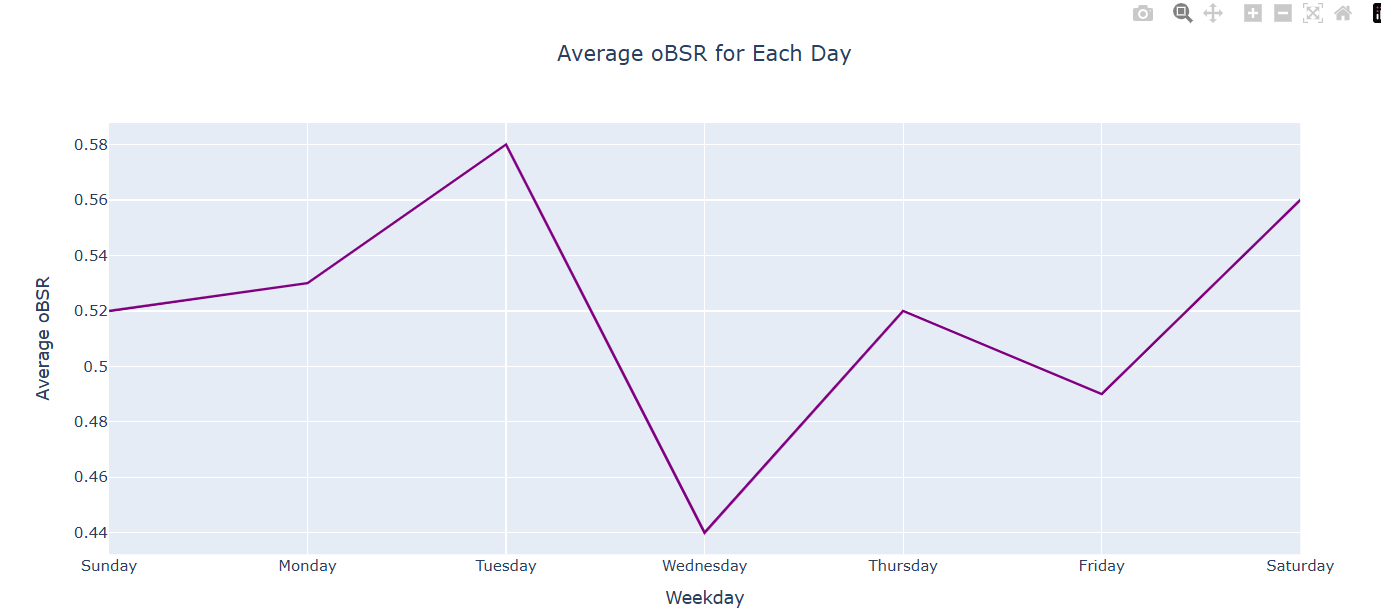

<font size=4 color=#355E3B><b>Observations</b></font>

* On average, Tuesday has the highest number of bookings per search conducted.
* On average, Wednesday has the lowest number of bookings per search conducted.

## 🏖️ 11. Customer Segmentation

<font color=#355E3B>*Bin customers based on booking frequency* </font>

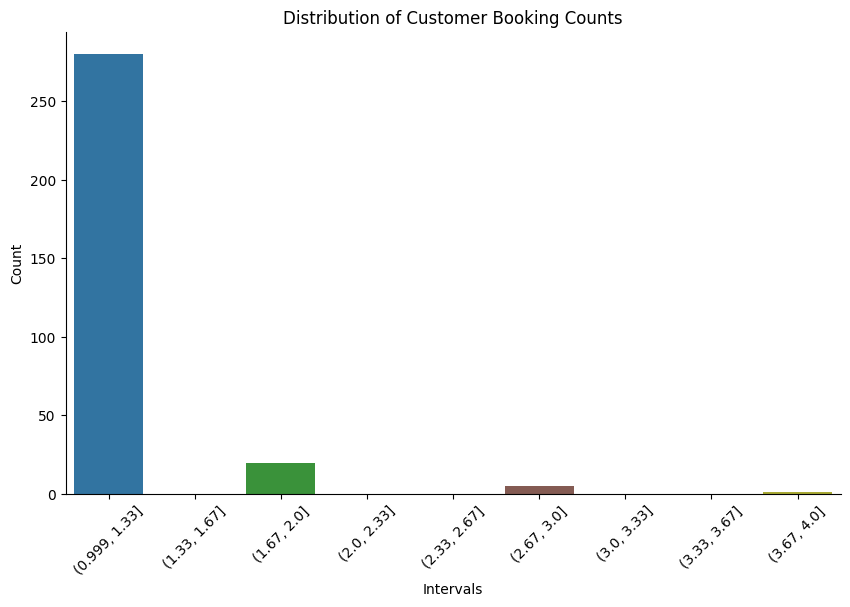

In [29]:
customer_booking_counts = bookings['customer_id'].value_counts().reset_index()

# ℹ️ Calculate the minimum and maximum values
min_value = customer_booking_counts['count'].min()
max_value = customer_booking_counts['count'].max()

# ℹ️ Total number of data points
N = len(customer_booking_counts)
# ℹ️ Sturges' Rule
num_bins = int(1 + np.log2(N))

# ℹ️ Calculate the bin width
bin_width = (max_value - min_value) / num_bins

# ℹ️ Create the bin edges and round them to 2 decimal points
bin_edges = [round(min_value + i * bin_width, 2) for i in range(num_bins + 1)]

# ℹ️ Assign intervals to booking counts
customer_booking_counts['intervals'] = pd.cut(customer_booking_counts['count'], bins=bin_edges, include_lowest=True)

interval_counts = customer_booking_counts['intervals'].value_counts().reset_index()

# ℹ️ Draw a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=interval_counts, x='intervals', y ='count', hue='intervals')
sns.despine()
plt.title('Distribution of Customer Booking Counts')
plt.xlabel('Intervals')
plt.ylabel('Count')
plt.legend().remove()
plt.xticks(rotation=45)
plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* The vast majority of customers book only once or just above that threshold.

* There are very few customers who book multiple times, suggesting that repeat booking behavior is not common within the dataset.

<font color=#355E3B>*Bin customers based on total amount spent* </font>

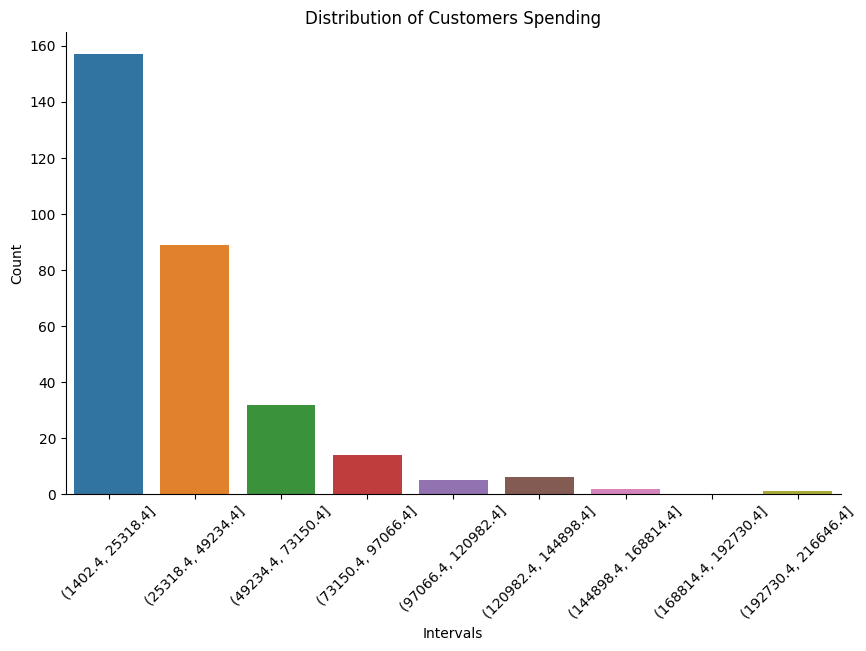

In [30]:
total_amount_per_customer = bookings.groupby('customer_id')['INR_Amount'].sum().reset_index(name='total_amount')

# ℹ️ Calculate the minimum and maximum values
min_value = total_amount_per_customer['total_amount'].min()
max_value = total_amount_per_customer['total_amount'].max()

# ℹ️ Calculate the bin width
bin_width = (max_value - min_value) / num_bins

# ℹ️ Create the bin edges and round them to 2 decimal points
bin_edges = [round(min_value + i * bin_width, 2) for i in range(num_bins + 1)]

# ℹ️ Assign intervals to booking counts
total_amount_per_customer['intervals'] = pd.cut(total_amount_per_customer['total_amount'], bins=bin_edges, include_lowest=True)

#  ℹ️ Round interval bounds to two decimal places
total_amount_per_customer['intervals'] = total_amount_per_customer['intervals'].apply(lambda x: f'({round(x.left, 2)}, {round(x.right, 2)}]')

#  ℹ️ Calculate the counts of each interval and reset the index
interval_counts = total_amount_per_customer['intervals'].value_counts().reset_index()

#  ℹ️ Draw a barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=interval_counts, x='intervals', y ='count', hue='intervals')
sns.despine()
plt.title('Distribution of Customers Spending')
plt.xlabel('Intervals')
plt.ylabel('Count')
plt.legend().remove()
plt.xticks(rotation=45)
plt.show()


<font size=4 color=#355E3B><b>Observations</b></font>

* There is a higher concentration of customer spending in the lower bins. The majority of customers spend between 1402.4 and 25318.4 INRs.
* There are only a few customers who spend significantly higher amounts, which could include luxury bookings or other high-end holiday packages.

## 🏖️ 12. Fraudulent Booking Detection

<font color=#355E3B>*Identify unusual bookings with extreme price values.*</font>

In [31]:
#  ℹ️ Define outlier threshold
price_mean = round(np.mean(bookings['INR_Amount']),2)
price_std = round(np.std(bookings['INR_Amount']),2)
threshold = price_mean + 3 * price_std

extreme_prices = bookings[bookings['INR_Amount'] > threshold]

<font color=#355E3B>*Visualize a scatter plot to visualize booking prices vs. number of passengers.*</font>

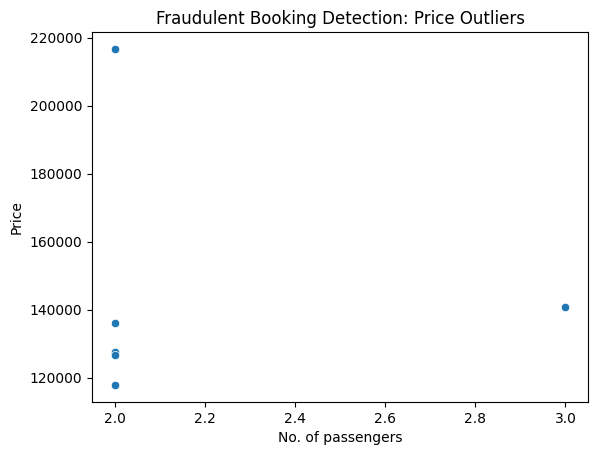

In [32]:
#  ℹ️ Create a scatterplot
sns.scatterplot(data=extreme_prices, x='no_of_passengers', y='INR_Amount')
plt.title('Fraudulent Booking Detection: Price Outliers')
plt.xlabel('No. of passengers')
plt.ylabel('Price')
plt.show()


<font size=4 color=#355E3B><b>Observations</b></font>

The points on the plot represent these notably high prices, which could suggest fraudulent activity, pricing errors, or luxury bookings. Further investigation is required to ascertain whether these are instances of fraudulent bookings or genuine high-price premium bookings

## 🏖️ 13. Price Sensitivity Analysis

<font color=#355E3B>*Analyze how fluctuations in fare prices affect booking rates.*</font>

In [33]:
price_bins = pd.cut(bookings['INR_Amount'], bins=10)
price_sensitivity = bookings.groupby(price_bins)['booking_id'].count().reset_index()
price_sensitivity.columns = ['price_range', 'booking_count']

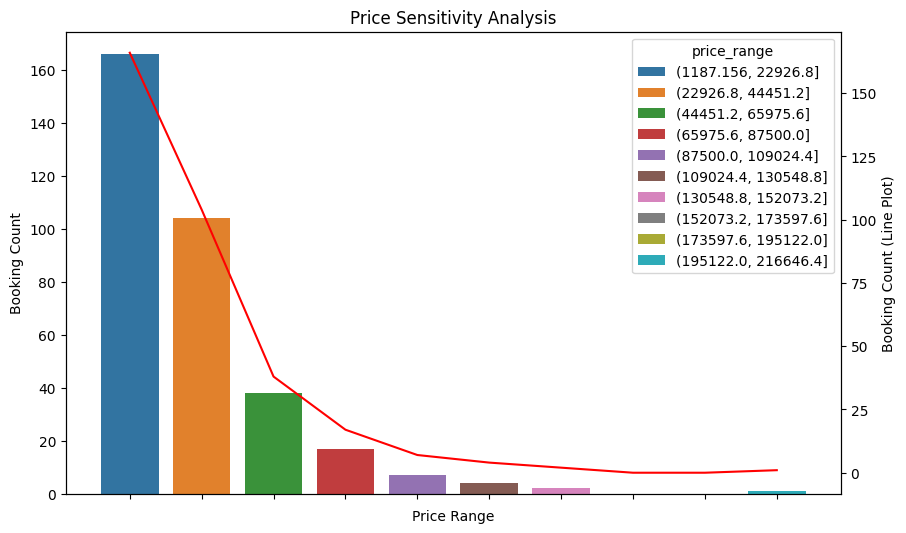

In [34]:
#  ℹ️Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=price_sensitivity, x='price_range', y='booking_count', hue='price_range')
plt.title('Price Sensitivity Analysis')
plt.xlabel('Price Range')
plt.ylabel('Booking Count')

# ℹ️ Remove xtick labels
ax.set_xticklabels([])

# ℹ️ Create a second y-axis for the line plot
ax2 = ax.twinx()
# Convert the categorical data in the 'price_range' column into numerical codes
price_sensitivity['price_range_num'] = price_sensitivity['price_range'].cat.codes
# Use the numerical representation for the line plot
sns.lineplot(data=price_sensitivity, x='price_range_num', y='booking_count', ax=ax2, color='red')
ax2.set_ylabel('Booking Count (Line Plot)')

plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

* Booking rates are highly sensitive to fare fluctuations, especially at lower prices.
* A steep decline in bookings occurs as fare prices increase.

## 🏖️ 14. Search Abandonment Analysis

<font color=#355E3B>*Use a  Funnel chart to visualize search-to-booking drop-off.*</font>

In [64]:
abandoned_searches = len(sessions[sessions['booking_id'].isnull()])
total_searched = len(sessions)
abandoned_search_rate = round((abandoned_searches / total_searched) * 100, 2)
completed_bookings = total_searched - abandoned_searches

print(f'The abandoned search rate for searches that do not end in bookings is {abandoned_search_rate:.0f}%.')

The abandoned search rate for searches that do not end in bookings is 76%.


In [54]:
# ℹ️ Prepare data for the funnel chart
stages = ['Search', 'Complete Booking']
counts = [total_searched, completed_bookings]

funnel_data = {
    'stages': stages,
    'counts': counts
}

# ℹ️ Create the funnel chart using Plotly
fig = go.Figure(go.Funnel(
    y=funnel_data['stages'],
    x=funnel_data['counts'],
    textinfo="value+percent initial",
    marker={"color": ["#636EFA", "#EF553B"]}
))

# ℹ️ Update layout for better visualization
fig.update_layout(
    title='Search-to-Booking Drop-off Funnel',
    yaxis_title='Stages',
    xaxis_title='Number of Customers',
    width=800,
    height=600
)

#ℹ️  Display the funnel chart
fig.show()

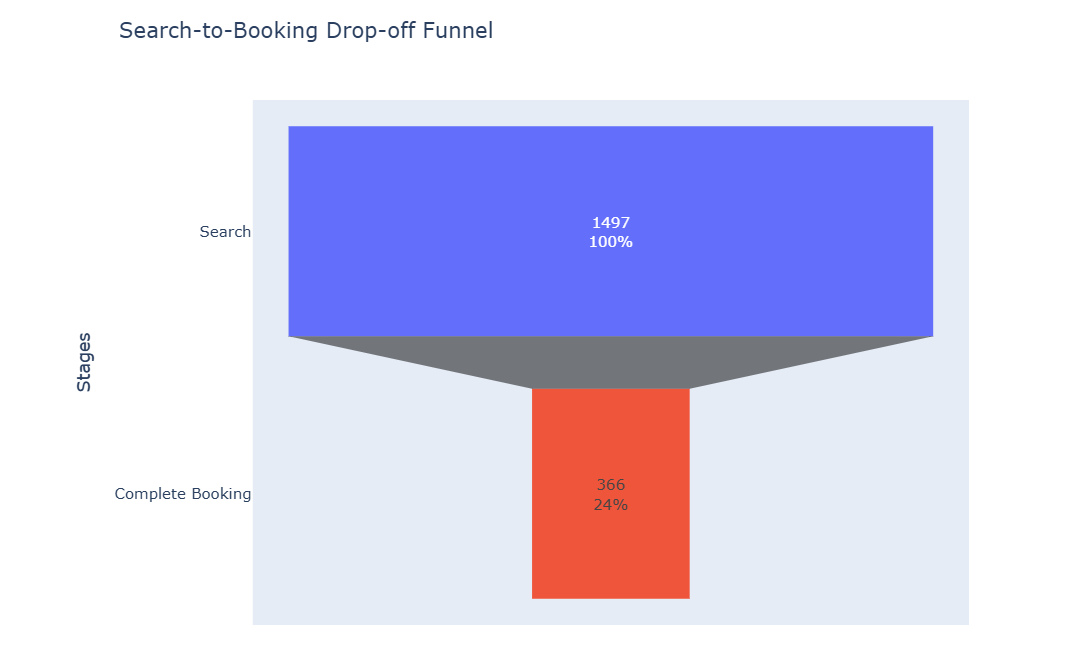

<font size=4 color=#355E3B><b>Observations</b></font>

The significant narrowing of the funnel shows that a large portion of users abandon the process after searching but before finalizing their bookings.
> Completed bookings represents only 24% of the initial searches.

<font color=darkcyan>*Determine why some searches do not lead to bookings.*</font>

* **Pricing Concerns**: Users may find the fares too high or not within their budget.
* **Lack of Availability**: Desired options may not be available, leading users to abandon their search.
* **Complex Booking Process**: If the checkout process is lengthy or complicated, users may leave before completing the booking.
* **Competitor Comparisons**: Users may be exploring multiple platforms before making a decision.
* **Technical Issues**: Poor user experience, slow website performance, or unexpected errors can cause drop-offs.

## 🏖️ 15. Loyalty Insights

<font color=#355E3B>*Identify repeat customers and analyze their preferences.*</font>

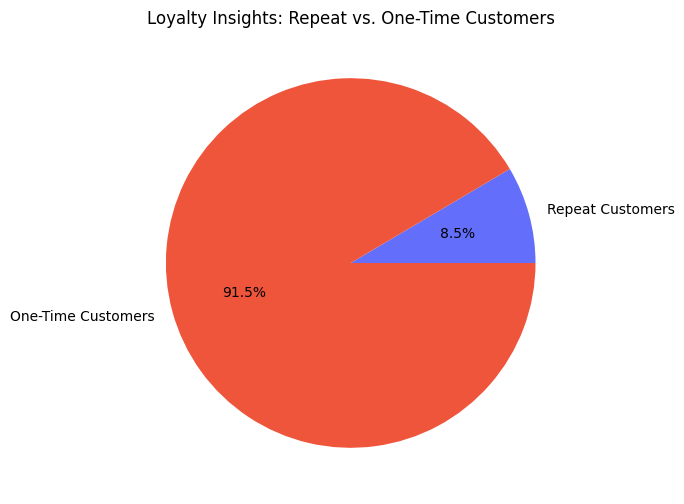

In [75]:
bookings_per_customer = bookings['customer_id'].value_counts().reset_index()

# ℹ️ Filter for repeat and one_time customers
repeat_customers = bookings_per_customer[bookings_per_customer['count'] > 1]
one_time_customers = bookings_per_customer[bookings_per_customer['count'] == 1]

# ℹ️ Create a piechart
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [len(repeat_customers), len(one_time_customers)]
colors = ['#636EFA', '#EF553B']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Loyalty Insights: Repeat vs. One-Time Customers')


plt.show()

<font size=4 color=#355E3B><b>Observations</b></font>

A significant majority of customers (over 90%) are one-time purchasers, suggesting potential challenges in customer retention or the possibility that customers only need to make a single purchase.